In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import PIL.Image as Image
import os
import pathlib


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir= '.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
data_dir= pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob("*/*.jpg"))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count= len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [7]:
roses= list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [8]:
flower_images_dict= {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "tulips": list(data_dir.glob("tulips/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*"))
}

In [9]:
flower_labels_dict= {
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "tulips": 3,
    "sunflowers": 4
}

In [10]:
len(flower_images_dict["roses"])

641

In [11]:
img= cv2.imread(str(flower_images_dict["roses"][0]))
img.shape

(240, 179, 3)

In [12]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [13]:
X, y= [], []

for flowers, images in flower_images_dict.items():
  for image in images:
    img= cv2.imread(str(image))
    resized_img= cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flower_labels_dict[flowers])

In [14]:
X = np.array(X)
y= np.array(y)

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [16]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [17]:
num_classes= 5
model= Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['acc'])

model.fit(X_train_scaled, y_train, epochs=25)




Epoch 1/25


86/86 [==============================] - 24s 246ms/step - loss: 1.2799 - acc: 0.4593
Epoch 2/25
86/86 [==============================] - 21s 248ms/step - loss: 0.9462 - acc: 0.6319
Epoch 3/25
86/86 [==============================] - 22s 251ms/step - loss: 0.7469 - acc: 0.7206
Epoch 4/25
86/86 [==============================] - 21s 240ms/step - loss: 0.5295 - acc: 0.8085
Epoch 5/25
86/86 [==============================] - 20s 234ms/step - loss: 0.3420 - acc: 0.8859
Epoch 6/25
86/86 [==============================] - 20s 233ms/step - loss: 0.2145 - acc: 0.9331
Epoch 7/25
86/86 [==============================] - 20s 237ms/step - loss: 0.1299 - acc: 0.9629
Epoch 8/25
86/86 [==============================] - 20s 236ms/step - loss: 0.0697 - acc: 0.9811
Epoch 9/25
86/86 [==============================] - 20s 234ms/step - loss: 0.0364 - acc: 0.9924
Epoch 10/25
86/86 [==============================] - 20s 233ms/step - loss: 0.0249 - acc: 0.9960
Epoch 11/25
86/86 [===============

In [18]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 60ms/step - loss: 2.4881 - acc: 0.6590


[2.4881057739257812, 0.6590414047241211]

In [19]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.5)
])

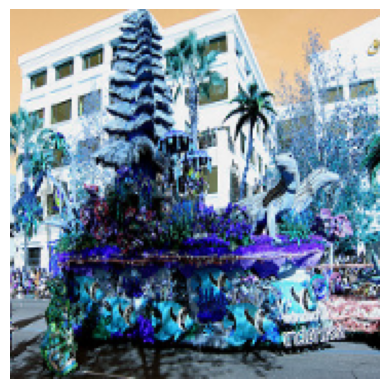

In [20]:
plt.axis('off')
plt.imshow(X[7])

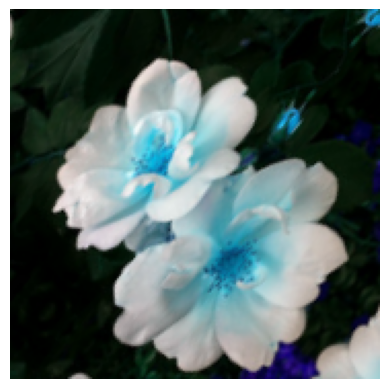

In [21]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [22]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.5)
])

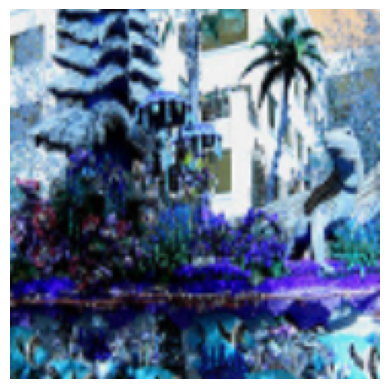

In [23]:
plt.axis('off')
plt.imshow(data_augmentation(X)[7].numpy().astype('uint8'))

In [26]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
num_classes= 5

model= Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ["accuracy"]
)

In [31]:
num_classes= 5

model= Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ["accuracy"]
)

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 32s 301ms/step - loss: 1.2629 - accuracy: 0.4662
Epoch 2/30
86/86 [==============================] - 26s 297ms/step - loss: 0.9884 - accuracy: 0.6315
Epoch 3/30
86/86 [==============================] - 26s 301ms/step - loss: 0.9112 - accuracy: 0.6552
Epoch 4/30
86/86 [==============================] - 26s 300ms/step - loss: 0.8415 - accuracy: 0.6704
Epoch 5/30
86/86 [==============================] - 27s 318ms/step - loss: 0.7969 - accuracy: 0.7035
Epoch 6/30
86/86 [==============================] - 29s 335ms/step - loss: 0.7638 - accuracy: 0.7017
Epoch 7/30
86/86 [==============================] - 26s 307ms/step - loss: 0.7225 - accuracy: 0.7198
Epoch 8/30
86/86 [==============================] - 26s 302ms/step - loss: 0.6735 - accuracy: 0.7409
Epoch 9/30
86/86 [==============================] - 26s 299ms/step - loss: 0.6639 - accuracy: 0.7467
Epoch 10/30
86/86 [==============================] - 26s 298ms/step - loss: 0.6130 - accura

In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
num_classes= 5

model= Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation= 'softmax')
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ["accuracy"]
)

model.fit(X_train_scaled, y_train, epochs=30)